## Install Required Libraries

In [1]:
!pip install -q ucimlrepo


In [2]:
!pip install -U kaleido

## Import required Libraries

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "svg"

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

## Download the Dermatology Dataset from UCI repository

In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
dermatology = fetch_ucirepo(id=33)

# data (as pandas dataframes)
X = dermatology.data.features
y = dermatology.data.targets
df = pd.merge(X, y, left_index=True, right_index=True)

df.head()



,erythema,scaling,definite-borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral-mucosal involvement,knee elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of the basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear infiltrate,band-like infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45.0,3


In [5]:
print(f" The Dermatology dataset consists of {X.shape[0]} samples (data points) and {X.shape[1]} features! ")


 The Dermatology dataset consists of 366 samples (data points) and 34 features! 


##Range, Distribution, and Type of features

Use this summary for identifying potential outliers, understanding feature types and variability to prepare them for the future analysis.

Analyze the data types and correct them if necessary. For instance, categorical and object variables may be changed their types to float or int when appropriate for further analysis.

 The **count** variable shows the number of *missing* values for each feature when it will be less than the total number of rows, indicating the need for potential data imputation!

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   erythema                                     366 non-null    int64  
 1   scaling                                      366 non-null    int64  
 2   definite-borders                             366 non-null    int64  
 3   itching                                      366 non-null    int64  
 4   koebner phenomenon                           366 non-null    int64  
 5   polygonal papules                            366 non-null    int64  
 6   follicular papules                           366 non-null    int64  
 7   oral-mucosal involvement                     366 non-null    int64  
 8   knee elbow involvement                       366 non-null    int64  
 9   scalp involvement                            366 non-null    int64  
 10  fa

In [7]:
df.describe()

,erythema,scaling,definite-borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral-mucosal involvement,knee elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of the basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear infiltrate,band-like infiltrate,age,class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,358.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,...,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,36.296089,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,...,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,15.324557,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,49.750000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000,6.000000


## Class Balancing

Balancing classes is crucial for developing accurate and fair machine learning models. By ensuring a more equal distribution of classes, we prevent the model from becoming biased towards the majority class and improve its ability to recognize and classify minor classes.



In [8]:
num_cols = df.columns.tolist()
num_cols.remove('class')

In [9]:
targetvalue = df['class'].value_counts()

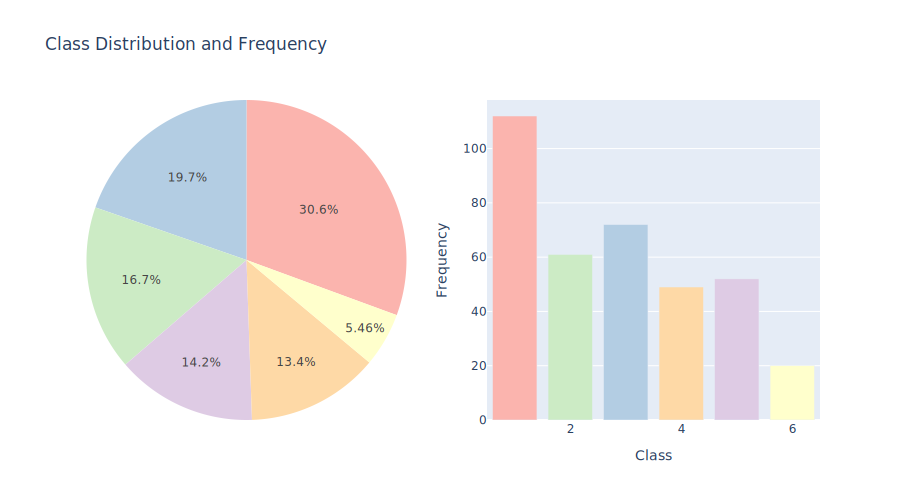

<Figure size 640x480 with 0 Axes>

In [10]:
# Create a subplot with 1 row and 2 columns
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'xy'}]])

# Generate a color sequence
colors = px.colors.qualitative.Pastel1

# Add pie chart
fig.add_trace(go.Pie(labels=targetvalue.index, values=targetvalue.values,
                     name="Class Distribution", marker_colors=colors), 1, 1)

# Add bar chart
fig.add_trace(go.Bar(x=targetvalue.index, y=targetvalue.values,
                     name="Class Frequency", marker_color=colors), 1, 2)

# Update layout
fig.update_layout(
    title_text="Class Distribution and Frequency",
    showlegend=False,
    height=500,
    width=900
)

# Update x-axis and y-axis labels for the bar chart
fig.update_xaxes(title_text="Class", row=1, col=2)
fig.update_yaxes(title_text="Frequency", row=1, col=2)

# Show the figure
fig.show()


plt.savefig("class_dist.png")

%matplotlib inline


## Feature Distribution

In [11]:
def plot_histograms(df_train, target_col, n_rows=12, n_cols=4):
    # Create subplot grid
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols,
                            figsize=(90, 10*n_rows),  # Adjusted for better proportions
                            constrained_layout=True)

    # Flatten axes array and calculate total subplots
    axes = axes.flatten()
    total_subplots = n_rows * n_cols

    # Get list of columns to plot (excluding target column)
    plot_columns = [col for col in df_train.columns if col != target_col]

    # Plot each numerical feature
    for i, (ax, var_name) in enumerate(zip(axes, plot_columns)):
        sns.histplot(data=df_train, x=var_name, kde=True, ax=ax)
        ax.set_title(f'{var_name} Distribution', fontsize=50)
        ax.set(xlabel=None, ylabel=None)

        # Add vertical line for mean
        mean_val = df_train[var_name].mean()
        ax.axvline(mean_val, color='r', linestyle='--', linewidth=1)

        # Add text annotation for mean
        ax.text(0.95, 0.95, f'μ: {mean_val:.2f}',
               transform=ax.transAxes,
               ha='right', va='top',
               fontsize=50,
               bbox=dict(facecolor='white', alpha=0.8))

    # Turn off empty subplots
    for j in range(len(plot_columns), total_subplots):
        axes[j].axis('off')

    plt.suptitle(f'Feature Distributions ({len(plot_columns)} Numerical Features)',
                y=1.02, fontsize=70, weight='bold')
    plt.show()

# Usage example
plot_histograms(df[num_cols], target_col='is_generated')
%matplotlib inline

plt.savefig("feature_dist.png")


<Figure size 640x480 with 0 Axes>

Most features are discrete, with values like 0, 1, 2, or 3, representing the severity or presence of specific dermatological attributes. Many features, such as "family history" and "melanin incontinence," are right skewed, meaning higher values are less common. Some features, like "erythema" and "scaling," have relatively balanced distributions. The "age" feature is continuous and follows a roughly normal distribution centered around middle age. These patterns highlight the variability in the dataset and suggest that preprocessing steps may be needed to handle imbalance for effective analysis.



## Correlation Analysis

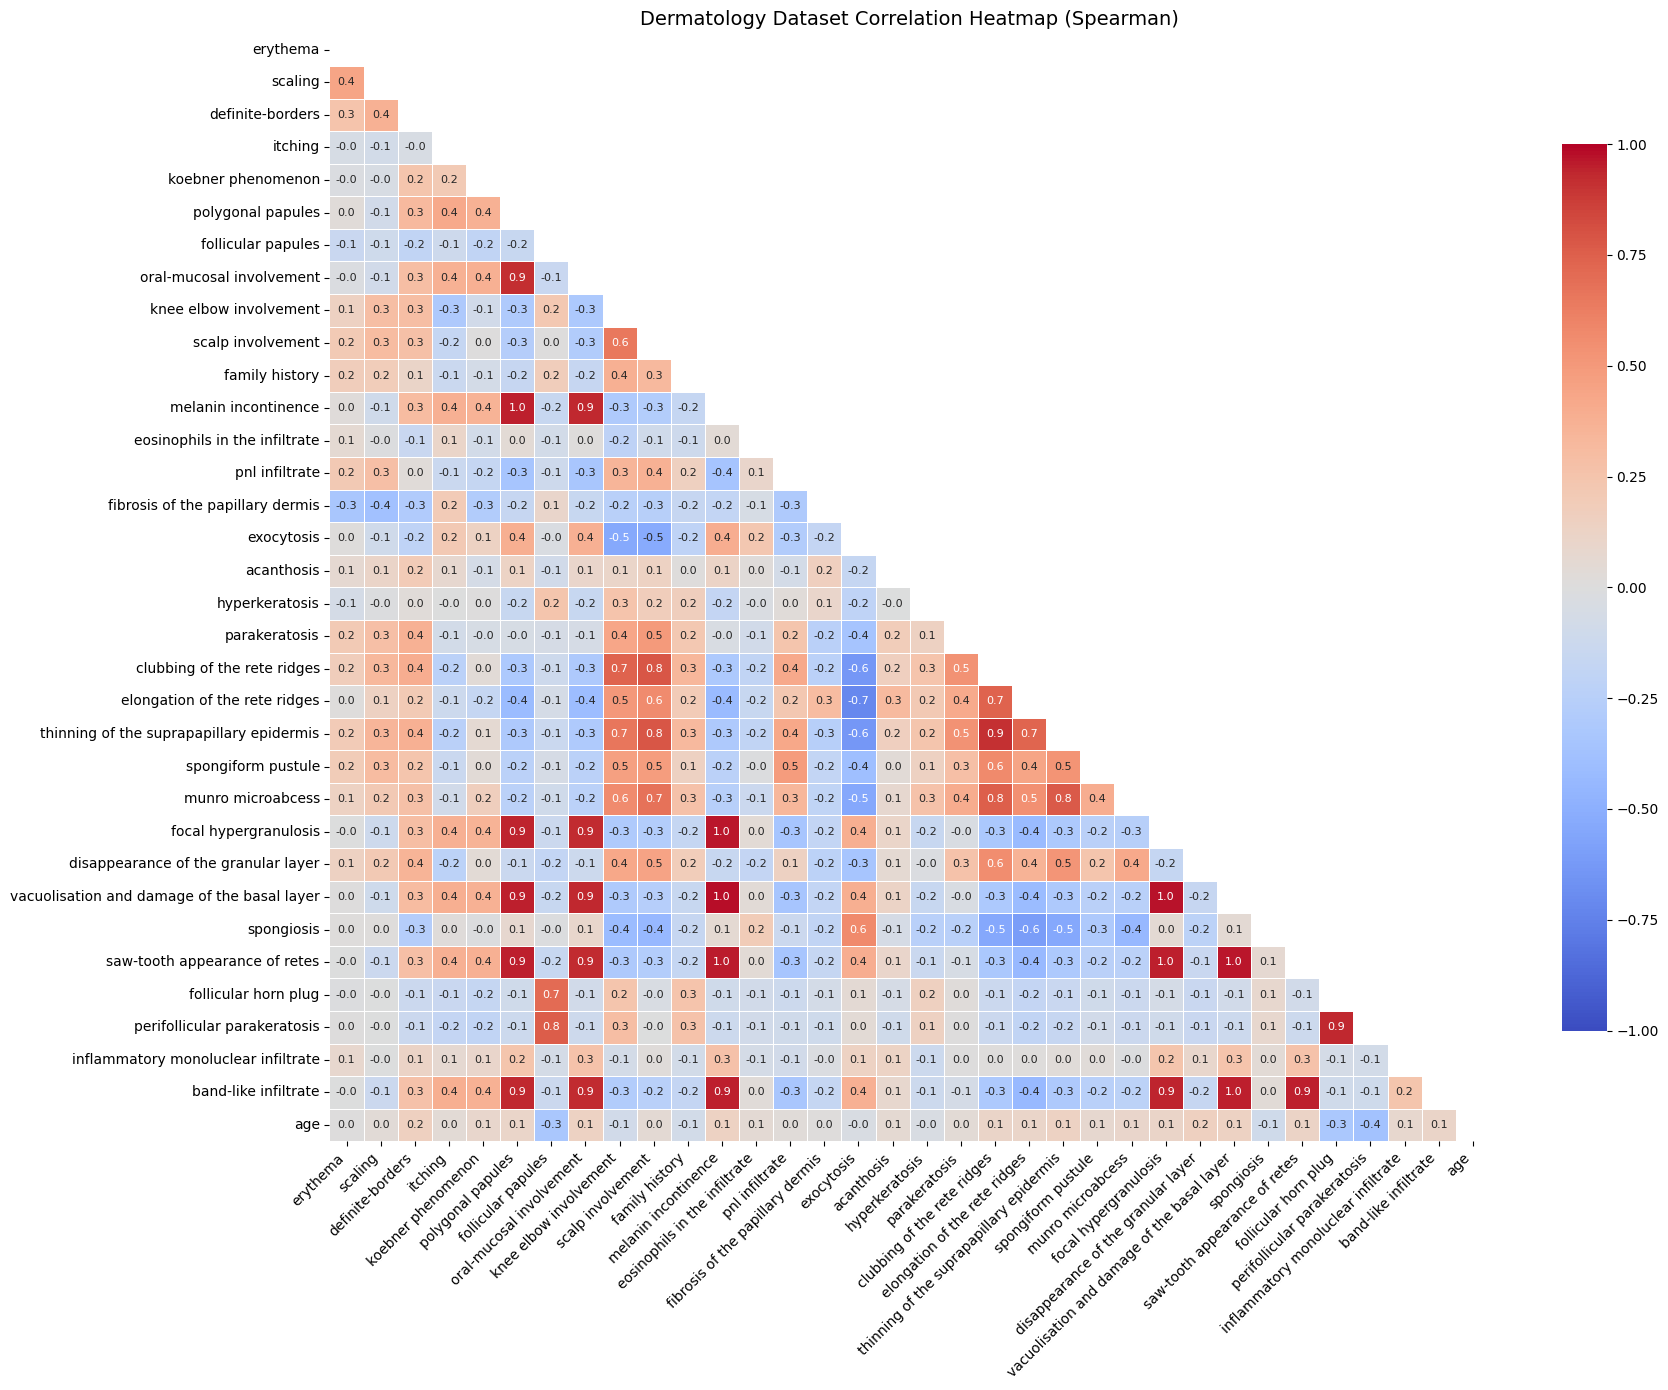

<Figure size 640x480 with 0 Axes>

In [12]:
# Compute correlation matrix (use Spearman for ordinal data)
corr = df[num_cols].corr(method='spearman')

# Mask insignificant correlations
mask = np.zeros_like(df[num_cols].astype(float).corr())
mask[np.triu_indices_from(mask)] = True

# Plot
plt.figure(figsize=(18, 14))
sns.heatmap(
    corr,
    mask=mask,
    cmap="coolwarm",
    annot=True,
    fmt=".1f",
    annot_kws={"size": 8},
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.title("Dermatology Dataset Correlation Heatmap (Spearman)", fontsize=14)
plt.tight_layout()
plt.show()
plt.savefig("feature_correlation.png")

Most features show weak correlations, but some pairs, like "band-like infiltrate" and "vacuolisation and damage of the basal layer," have strong positive relationships. Negative correlations are less common but can be seen in features like "elongation of ridge retes" and "exocitosis".

## Outlier Detection

Outlier analysis is important as it can indicate dat entery errors, measurement errors, and rare conditions. Outliers can skew model training and lead to poor generalization.

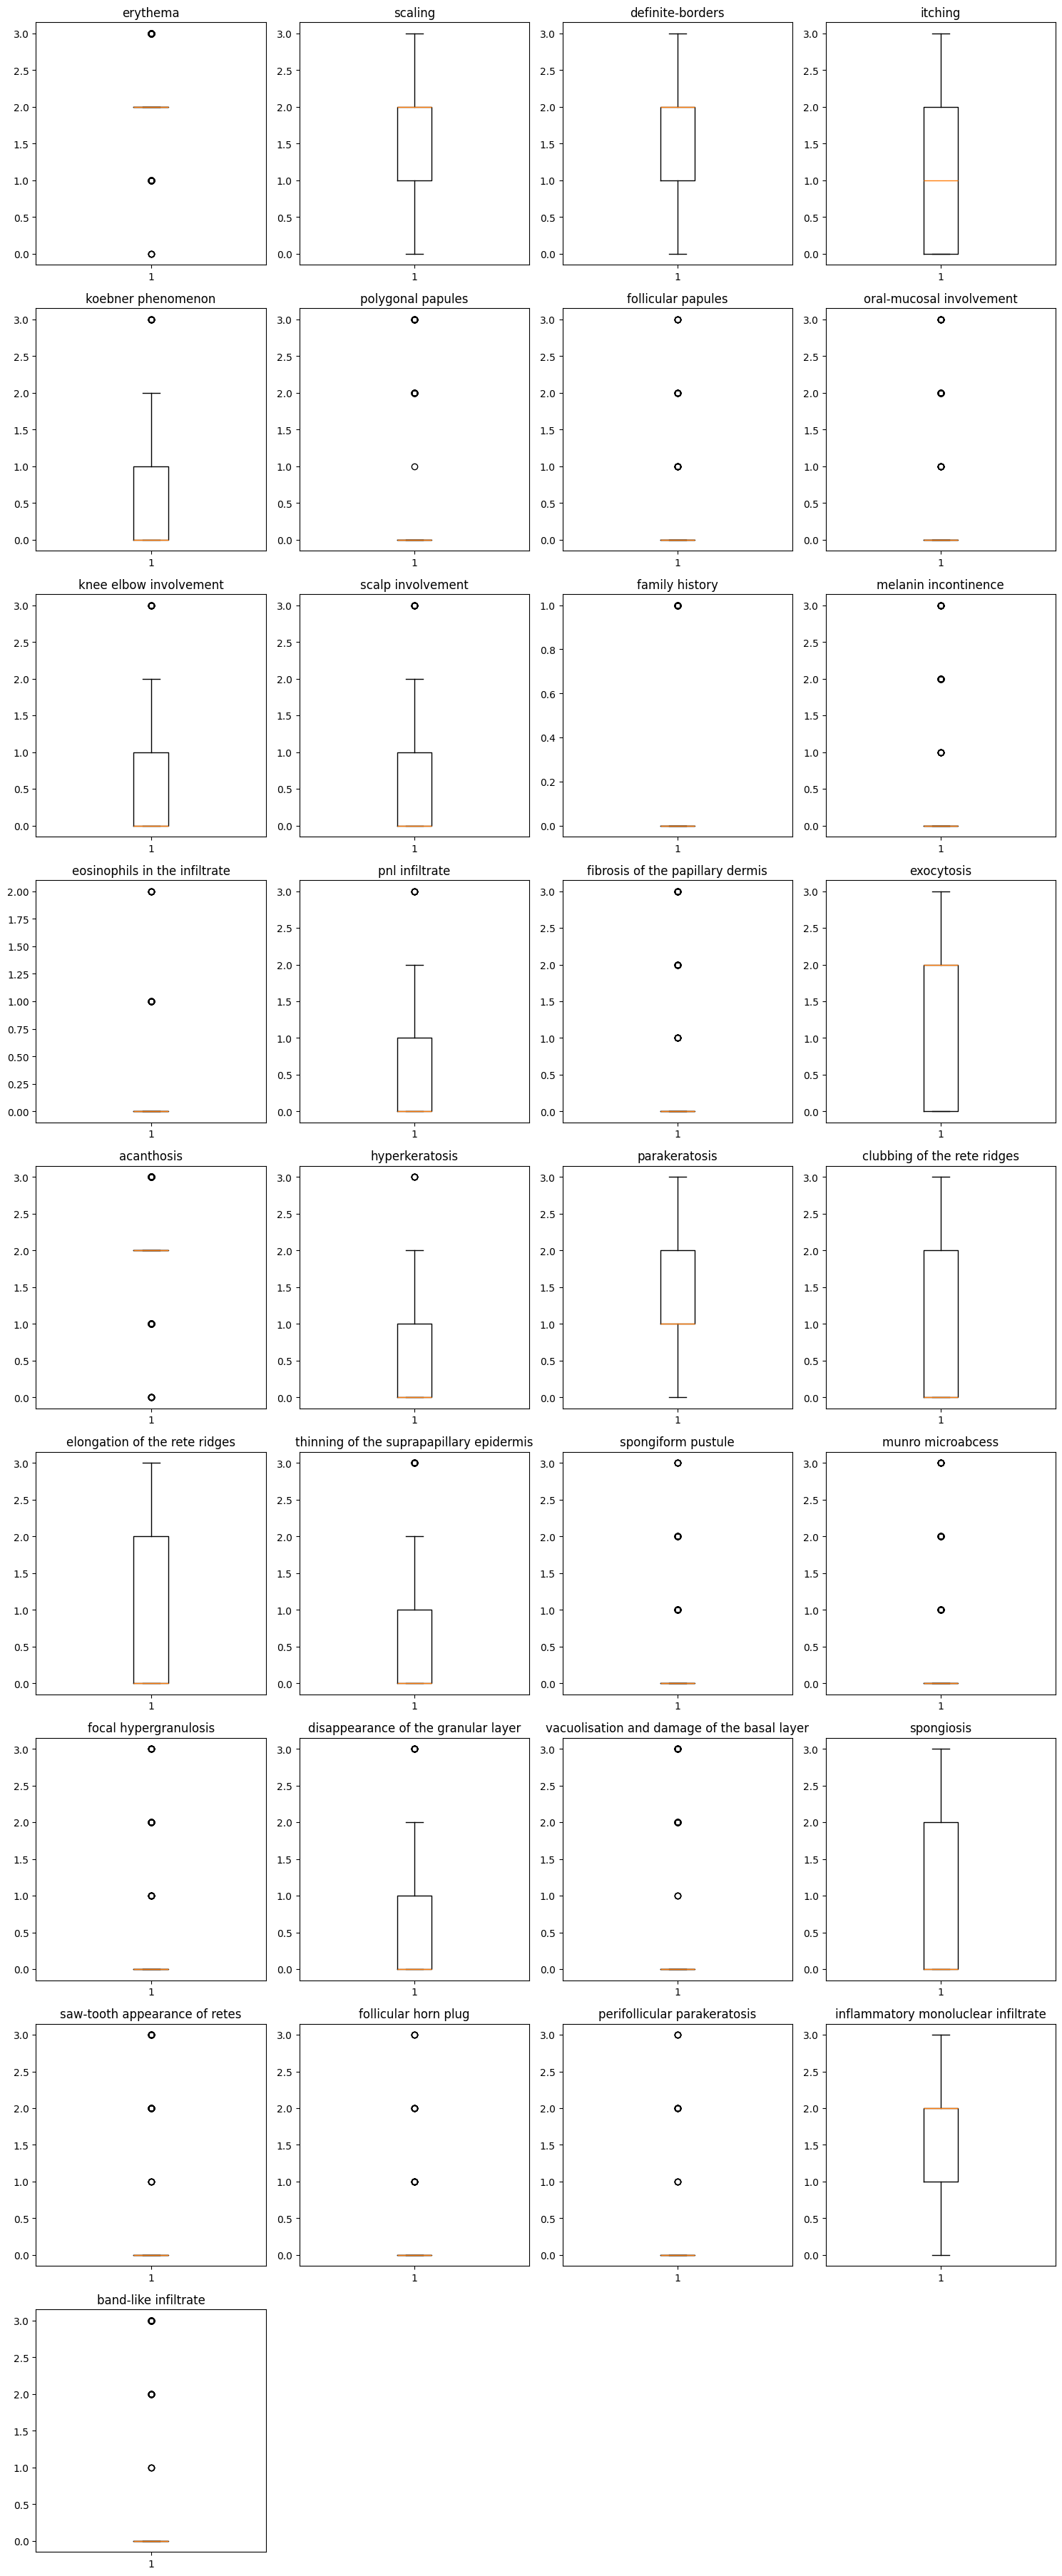

,Feature,Outlier_Count_ZScore,Outlier_Count_IQR,Missing_Data
erythema,erythema,4,151,0
scaling,scaling,0,0,0
definite-borders,definite-borders,0,0,0
itching,itching,0,0,0
koebner phenomenon,koebner phenomenon,0,18,0
polygonal papules,polygonal papules,0,69,0
follicular papules,follicular papules,22,33,0
oral-mucosal involvement,oral-mucosal involvement,13,67,0
knee elbow involvement,knee elbow involvement,0,23,0
scalp involvement,scalp involvement,0,16,0


<Figure size 640x480 with 0 Axes>

In [13]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# Step 1: Check for Missing Values
missing_values = df.isnull().sum()[:-2]

# Step 2: Conduct two Outlier Detection Methods, 1:Z-Score and 2:IQR

# Method 1: Z-score Analysis
z_scores = np.abs(stats.zscore(df.iloc[:, :-2]))  # Eclude 'age' and 'class' columns
threshold = 3  # Typically used threshold for Z-score

# Identify features and their corresponding outlier counts based on Z-scores
outlier_counts_zscore = (z_scores > threshold).sum(axis=0)

# Method 2: IQR Method for Outlier Detection
Q1 = df.iloc[:, :-2].quantile(0.25)
Q3 = df.iloc[:, :-2].quantile(0.75)
IQR = Q3 - Q1

# Identifying outliers using the IQR method
outliers_iqr = ((df.iloc[:, :-2] < (Q1 - 1.5 * IQR)) | (df.iloc[:, :-2] > (Q3 + 1.5 * IQR))).sum()

# Method 3: Visualizing Outliers with Boxplots for Each Feature
plt.figure(figsize=(15, 40))
for i, column in enumerate(df.columns[:-2], 1):
    plt.subplot(10, 4, i)
    plt.boxplot(df[column])
    plt.title(column)

plt.tight_layout()
plt.show()
plt.savefig("feature_boxplot.png")

# Summary of missing values and outliers
outlier_summary = pd.DataFrame({
    'Feature': df.columns[:-2],
    'Outlier_Count_ZScore': outlier_counts_zscore,
    'Outlier_Count_IQR': outliers_iqr,
    'Missing_Data': missing_values.values  # adds column to dataframe with missing data count.
})

# Display the summary of missing values and outliers
outlier_summary


When outlier analysis shows a smaller value for the Z-score but a high value for the IQR (Interquartile Range), it suggests that the data point may not be far from the mean in terms of standard deviations (as measured by Z-score) but is significantly distant from the majority of data points within the interquartile range. This typically happens when the data distribution is skewed or has heavy tails, where the mean and standard deviation are less representative of the central tendency and spread of the data compared to the median and quartiles. Howver, to handle outliers, we need to take further steps. We can use multivariate outlier methods to detect outlier data points first, and then visualize the outliers using PCA to see if they form distinct and correct clusters.

- multivariate outlier methods

In [14]:
# Step 1: Detect outliers
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.05, random_state=42)
outliers = iso_forest.fit_predict(df) == -1

# Step 2: Analyze outliers
print("Number of outliers:", outliers.sum())
print("Outlier samples:")
print(df[outliers])

# Step 3: Handle outliers (e.g., remove)
X_clean = df[~outliers]

# Step 4: Verify impact
print("Original shape:", df.shape)
print("Cleaned shape:", X_clean.shape)

Number of outliers: 19
Outlier samples:
     erythema  scaling  definite-borders  itching  koebner phenomenon  \
14          2        2                 3        3                   0   
17          3        3                 3        0                   0   
18          2        1                 3        3                   3   
20          2        1                 1        2                   0   
23          2        2                 2        3                   2   
26          1        1                 0        1                   0   
32          2        3                 3        3                   3   
36          2        1                 2        3                   2   
78          0        0                 0        0                   0   
93          3        3                 3        3                   3   
142         3        2                 2        3                   2   
143         2        1                 1        3                   2   
184        

- PCA

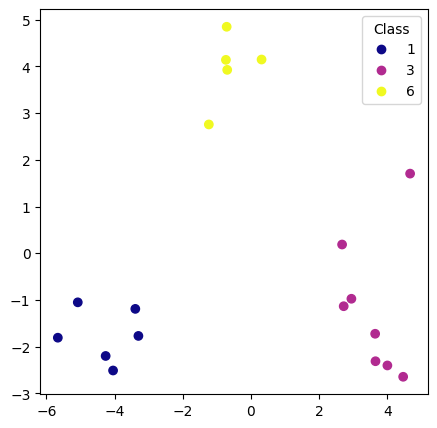

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from collections import OrderedDict


x_pca = df[outliers].iloc[:,:-2].values
y_pca = df[outliers].iloc[:, -1].values

# Scale data before applying PCA
scaling=StandardScaler()

# Use fit and transform method
scaling.fit(x_pca)
Scaled_data=scaling.transform(x_pca)

# Set the n_components=3
principal=PCA(n_components=3)
principal.fit(Scaled_data)
x=principal.transform(Scaled_data)

plt.figure(figsize=(5,5))
scatter = plt.scatter(x[:,0],x[:,1],c=y_pca,cmap='plasma')

# Create a custom legend
handles, labels_ = scatter.legend_elements()
unique_labels = np.unique(y_pca)
handles_dict = OrderedDict(zip(unique_labels, handles))  # Ensures original label order
plt.legend(handles_dict.values(), handles_dict.keys(), title="Class")

plt.savefig("outlier_pca.png")






As the outliers form distinct clusters, we decide to retain these outlier points for our further analysis

## Understanding of data using t-SNE

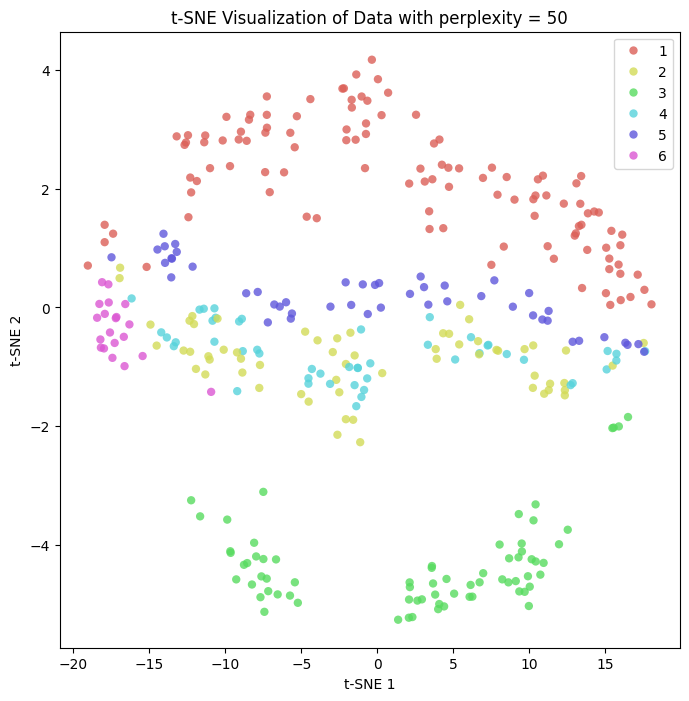

<Figure size 640x480 with 0 Axes>

In [16]:
df.dropna(subset=['age'], inplace=True)
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values



# Apply t-SNE
tsne = TSNE(n_components=2, random_state=110, perplexity = 50)
x_tsne = tsne.fit_transform(x)


# Create a scatterplot of the t-SNE graph
plt.figure(figsize=(8, 8))
sns.scatterplot(
    x=x_tsne[:,0], y=x_tsne[:,1],
    hue=y, palette=sns.color_palette("hls", len(np.unique(y))),
    alpha=0.8, edgecolor='none'
)


plt.title('t-SNE Plot for Dermatology Dataset')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE Visualization of Data with perplexity = 50')
plt.legend(loc='upper right')
plt.show()
plt.savefig("tsne.png")


We can see that some classes cluster naturally while the others are not visually seperable. For example, Classes 1, 3, 6 appear to be well seperated, but classes 2, 4, and 5 show overlapping patterns, making it challenging to seperate them effectively.